<a href="https://colab.research.google.com/github/charu286/ML_lab/blob/exp9/exp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
  X = np.linspace(-3,3,100)
  y = np.sin(X) + 0.1*np.random.randn(100)
  return X.reshape(-1,1), y

In [ ]:
def add_bias(X):
  return np.hstack((np.ones((X.shape[0],1)),X))

In [ ]:
def get_weights(X, x_query, tau):
  m = X.shape[0]
  weights = np.exp(-np.square(X - x_query).flatten()/ (2*tau**2))
  return np.diag(weights)

In [ ]:
def locally_weighted_regression(X,y,tau, X_query):
    X_bias = add_bias(X)
    y_pred = []

    for x in X_query:
        W = get_weights(X,x,tau)
        theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ y
        x_bias = np.array([1,x[0]])
        y_hat = x_bias @ theta
        y_pred.append(y_hat)


    return np.array(y_pred)

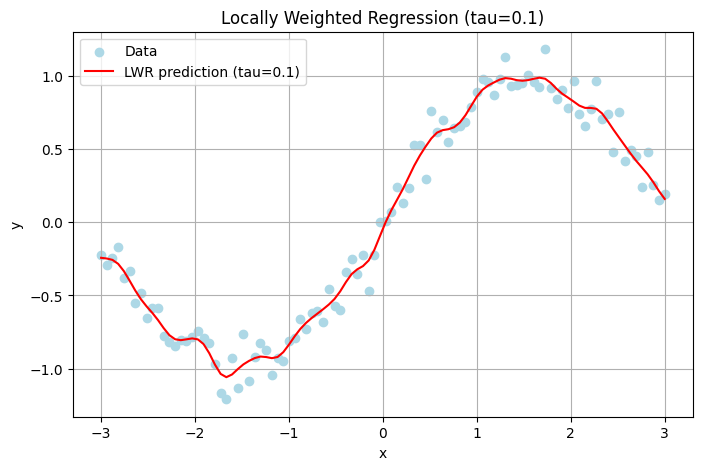

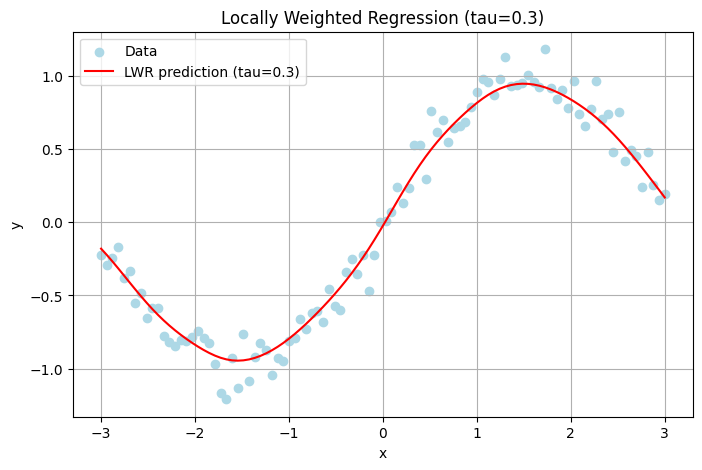

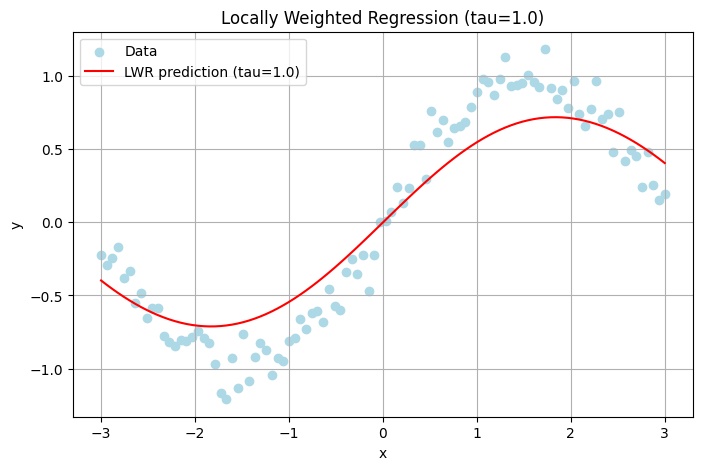

In [ ]:
def main():
    X,y = generate_data()
    X_query = np.linspace(-3,3,100).reshape(-1,1)

    for tau in [0.1,0.3,1.0]:
        y_pred = locally_weighted_regression(X, y ,tau, X_query)

        plt.figure(figsize=(8,5))
        plt.scatter(X, y, label="Data", color="lightblue")
        plt.plot(X_query, y_pred, label=f"LWR prediction (tau={tau})",color="red")
        plt.title(f"Locally Weighted Regression (tau={tau})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()
main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd

In [ ]:
def add_bias(X):
  return np.hstack([np.ones((X.shape[0],1)),X])

In [ ]:
def get_weights(X,x_query,tau):
    weights = np.exp(-np.square(X-x_query).flatten()/(2*tau**2))
    return np.diag(weights)

In [ ]:
def locally_weighted_regression(X,y,tau,X_query):
    X_bias = add_bias(X)
    y_pred = []

    for x in X_query:
        W = get_weights(X,x,tau)
        theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ y
        x_bias = np.array([1, x[0]])
        y_hat = x_bias @ theta
        y_pred.append(y_hat)

    return np.array(y_pred)

In [ ]:
def load_iris_data():
    iris = datasets.load_iris()
    X = iris.data[:, 2].reshape(-1,1)
    y = iris.data[:,3]
    return X, y

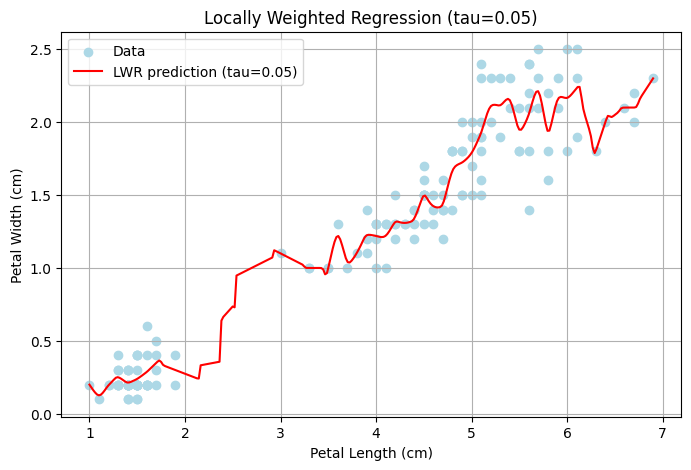

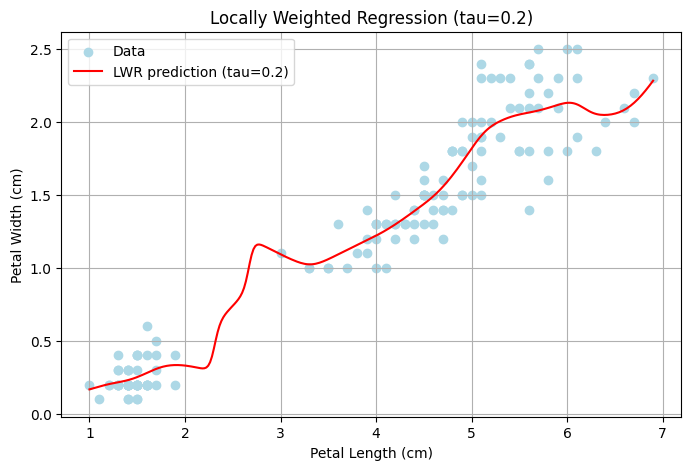

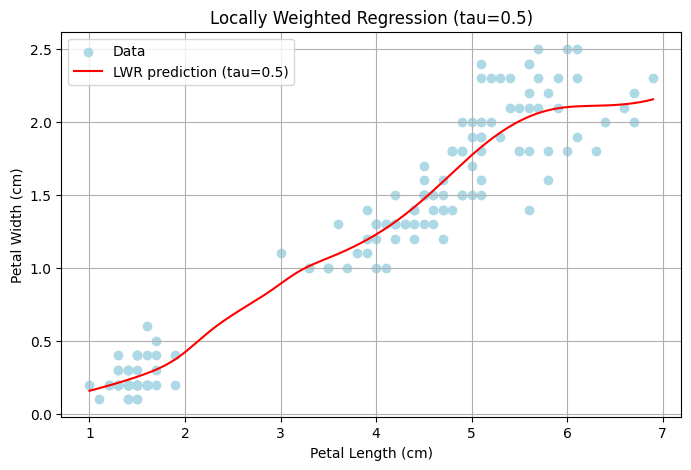

In [ ]:
def main():
    X,y = load_iris_data()
    X_query = np.linspace(X.min(), X.max(),300).reshape(-1,1)

    for tau in [0.05,0.2,0.5]:
        y_pred = locally_weighted_regression(X,y,tau,X_query)

        plt.figure(figsize=(8,5))
        plt.scatter(X,y,label="Data",color="lightblue")
        plt.plot(X_query,y_pred,label=f"LWR prediction (tau={tau})",color="red")
        plt.title(f"Locally Weighted Regression (tau={tau})")
        plt.xlabel("Petal Length (cm)")
        plt.ylabel("Petal Width (cm)")
        plt.legend()
        plt.grid(True)
        plt.show()
main()